In [1]:
import sys
sys.path.append('../src')

from models.ViTL16Model.train import train as train_ViTL16Model

from utils.show_graph import plot_history

In [2]:
package_model_path, loss_history, auc_history = train_ViTL16Model(
    num_epochs=20,
    learning_rate=1e-05,
    batch_size=4,
    flozen=True
)

d:\repo\tkser\technopro-food-package\.venv\Lib\site-packages\albumentations\augmentations\dropout\cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(
[DEBUG] 2023-09-18 18:31:44 - Using device: cuda(NVIDIA GeForce RTX 3080)
[DEBUG] 2023-09-18 18:31:44 - Starting training on cuda at 2023-09-18 18:31:44
[DEBUG] 2023-09-18 18:31:44 - Model: VisionTransformer
[DEBUG] 2023-09-18 18:31:44 - Model parameters:
[DEBUG] 2023-09-18 18:31:44 - class_token: torch.Size([1, 1, 1024])
[DEBUG] 2023-09-18 18:31:44 - conv_proj.weight: torch.Size([1024, 3, 16, 16])
[DEBUG] 2023-09-18 18:31:44 - conv_proj.bias: torch.Size([1024])
[DEBUG] 2023-09-18 18:31:44 - encoder.pos_embedding: torch.Size([1, 1025, 1024])
[DEBUG] 2023-09-18 18:31:44 - encoder.layers.encoder_layer_0.ln_1.weight: torch.Size([1024])
[DEBUG] 2023-09-18 18:31:44 - encoder.layers.encoder_layer_0.ln_1.bias: torch.Size([1024])
[DEBUG] 2023-09-18 18:31:44 - encoder.layers.encoder_layer_0.self_atten

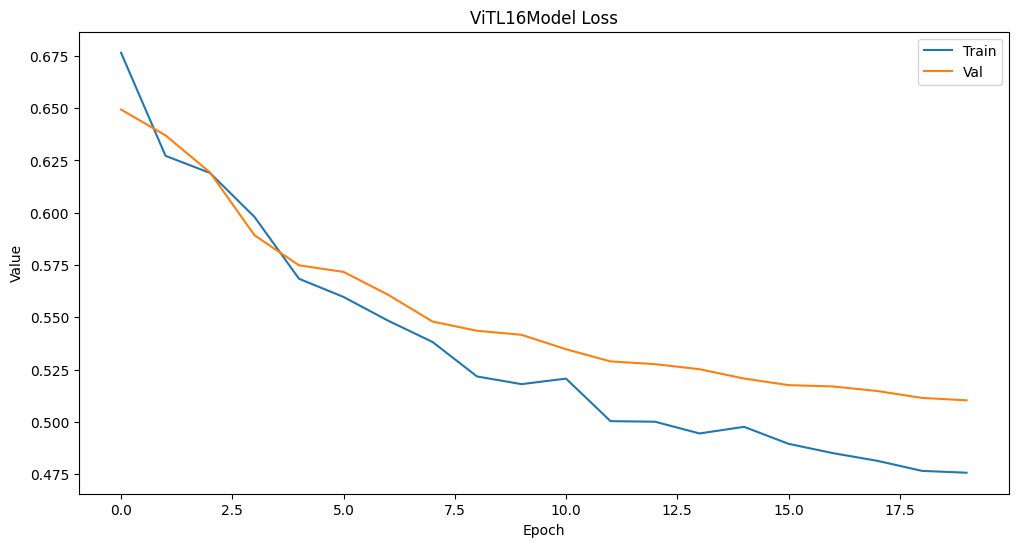

In [3]:
plot_history(loss_history, "ViTL16Model Loss")

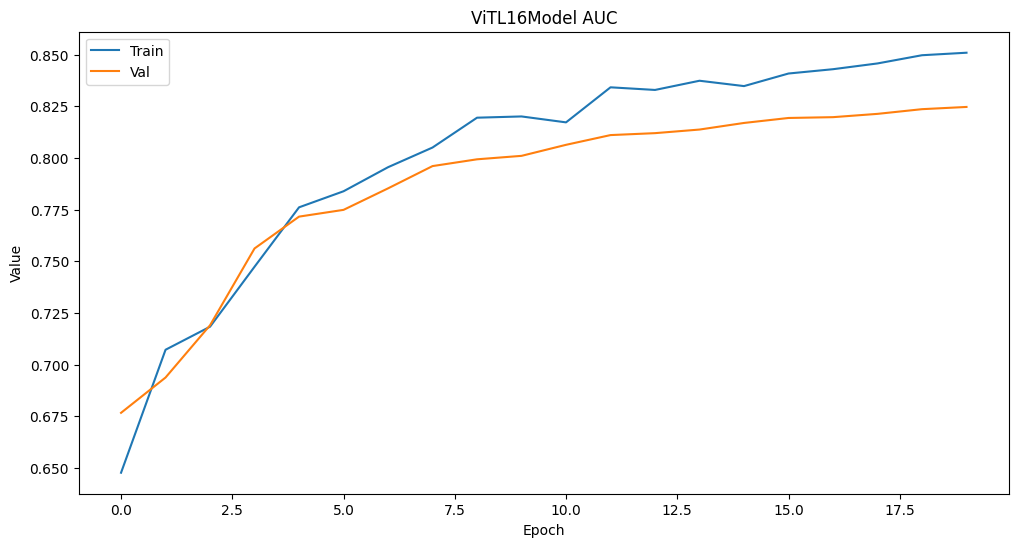

In [4]:
plot_history(auc_history, "ViTL16Model AUC")